In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pair_solver

In [2]:
print(f"Numpy version: {np.__version__};\npair_solver version: {pair_solver.__version__}")

Numpy version: 1.22.3;
pair_solver version: 0.3.0


Below we visualise the scaling of the PCA and MC solutions, as well as look at example solutions in 2D.

In [37]:
pca_loss_ratios = []
mc_loss_ratios = []
mc_long_loss_ratios = []
for x in range(1,11):
    coords = np.random.random((100, x))
    pca_holder = np.zeros(5)
    mc_holder = np.zeros(5)
    mc_long_holder = np.zeros(5)
    for j in range(5):
        _, random_loss = pair_solver.random_solution(coords)
        _, pca_loss = pair_solver.pca_solution(coords)
        _, mc_loss = pair_solver.mc_solution(coords, budget=2500, num_logs=0)
        _, mc_long_loss = pair_solver.mc_solution(coords, budget=25000, num_logs=0)
        pca_holder[j] = (random_loss/pca_loss)
        mc_holder[j] = (random_loss/mc_loss)
        mc_long_holder[j] = (random_loss/mc_long_loss)
    pca_loss_ratios.append((pca_holder.mean(), pca_holder.std()))
    mc_loss_ratios.append((mc_holder.mean(), mc_holder.std()))
    mc_long_loss_ratios.append((mc_long_holder.mean(), mc_long_holder.std()))

For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.


In [18]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=30)

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(13,8))
y = np.asarray(pca_loss_ratios)
ax.scatter(range(1,11), y[:,0], s=100, color='blue', label="PCA", marker='x')
ax.errorbar(range(1,11), y[:,0], yerr=y[:,1], color='blue', fmt='none')
y = np.asarray(mc_loss_ratios)
ax.scatter(range(2,11), y[1:,0], s=100, color='orange', label="Monte Carlo (2500)", marker='x')
ax.errorbar(range(2,11), y[1:,0], yerr=y[1:,1], color='orange', fmt='none')
y = np.asarray(mc_long_loss_ratios)
ax.scatter(range(2,11), y[1:,0], s=100, color='red', label="Monte Carlo (25000)", marker='x')
ax.errorbar(range(2,11), y[1:,0], yerr=y[1:,1], color='red', fmt='none')
ax.set_yscale('log')
ax.set_ylim(0.9,50)
ax.legend()
ax.set_ylabel("Random loss / Solver loss")
ax.set_xlabel("Number of dimensions")
plt.show()
fig.savefig("solution_scaling.pdf")

In [74]:
mc_scaling = np.zeros((3,12))
for i, dim in enumerate(range(3,10,3)):
    coords = np.random.random((100, dim))
    pca_holder = np.zeros(5)
    mc_holder = np.zeros(5)
    mc_long_holder = np.zeros(5)
    for j, pow in enumerate(range(6,18)):
        budget = int(2**pow)
        _, random_loss = pair_solver.random_solution(coords)
        _, mc_loss = pair_solver.mc_solution(coords, budget=budget, num_logs=0)
        mc_scaling[i,j] = mc_loss

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(13,8))
labels = ["3 dimensions", "6 dimensions", "9 dimensions"]
xticks = [2**x for x in range(6,18)]
for i in range(3):
    ax.scatter(xticks, mc_scaling[i,:], s=100, label=labels[i])
ax.legend()
ax.set_ylabel("Final distance between particles")
ax.set_xlabel('Monte Carlo budget')
ax.set_xscale('log')
plt.show()
fig.savefig("mc_scaling.pdf")

In [77]:
def show_solution(coords, sol):
    fig, ax = plt.subplots(1, 1, figsize=(13,13))
    for pair in sol:
        p1, p2 = pair
        xs = coords[[p1,p2],0]
        ys = coords[[p1,p2],1]
        ax.plot(xs,ys, 'x-', color='k')
    plt.show()
    return fig

In [78]:
coords = np.random.rand(100,2)

In [79]:
rand_sol, rand_obj = pair_solver.random_solution(coords)
pca_sol, pca_obj = pair_solver.pca_solution(coords)
mc_sol_short, mc_obj = pair_solver.mc_solution(coords, budget = 1000)
mc_sol_long, mc_long_obj = pair_solver.mc_solution(coords, budget = 10000)

Step: 200, acc. ratio: 0.455
Step: 400, acc. ratio: 0.287
Step: 600, acc. ratio: 0.220
Step: 800, acc. ratio: 0.177
Ran for 1000 steps, with acc. ratio: 0.149
Initial loss: 14.74, new_loss: 8.38
Final beta: 100.9
Step: 2000, acc. ratio: 0.081
Step: 4000, acc. ratio: 0.048
Step: 6000, acc. ratio: 0.033
Step: 8000, acc. ratio: 0.027
Ran for 10000 steps, with acc. ratio: 0.0227
Initial loss: 14.74, new_loss: 3.78
Final beta: 100.9


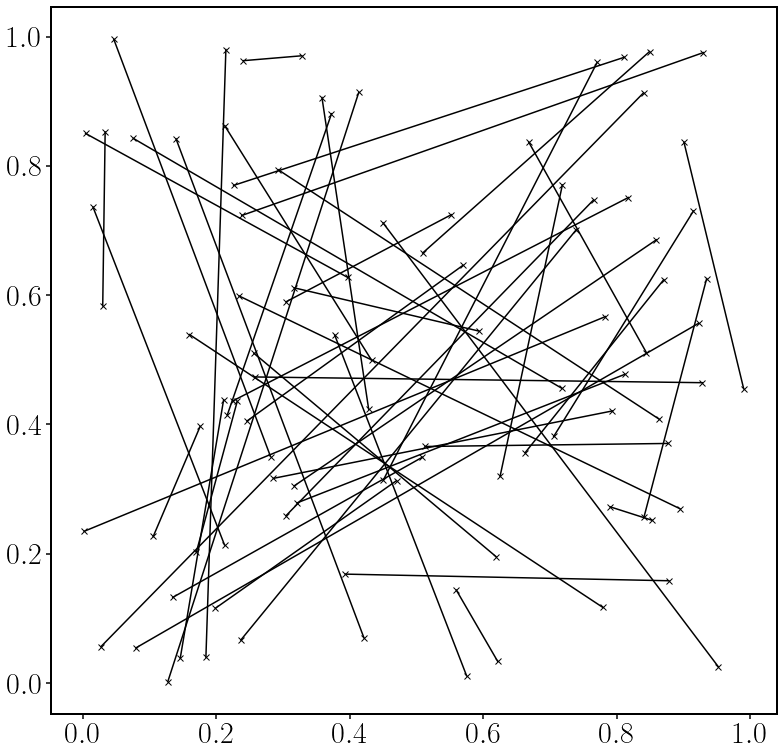

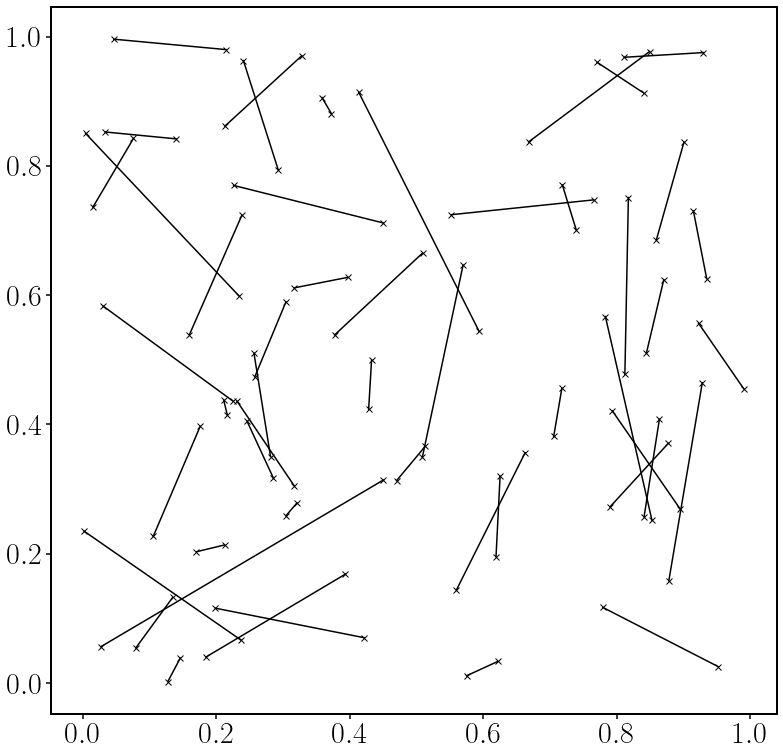

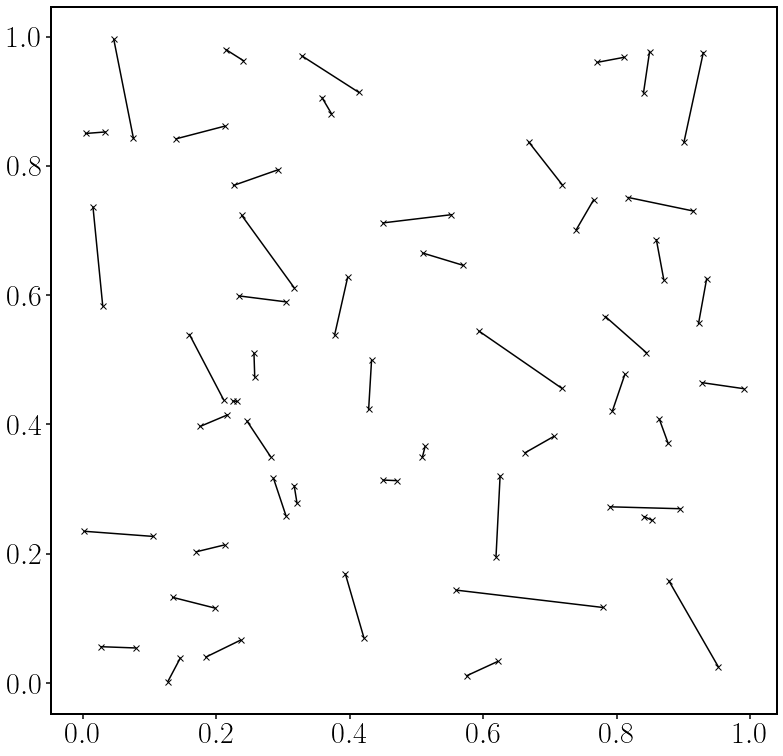

In [85]:
fig_titles = ['rand_sol.pdf', 'pca_sol.pdf', 'mc_short_sol.pdf', 'mc_long_sol.pdf']
sols = [rand_sol, pca_sol, mc_sol_short, mc_sol_long]
for title, sol in zip(fig_titles, sols):
    fig = show_solution(coords,sol)
    fig.savefig(title)

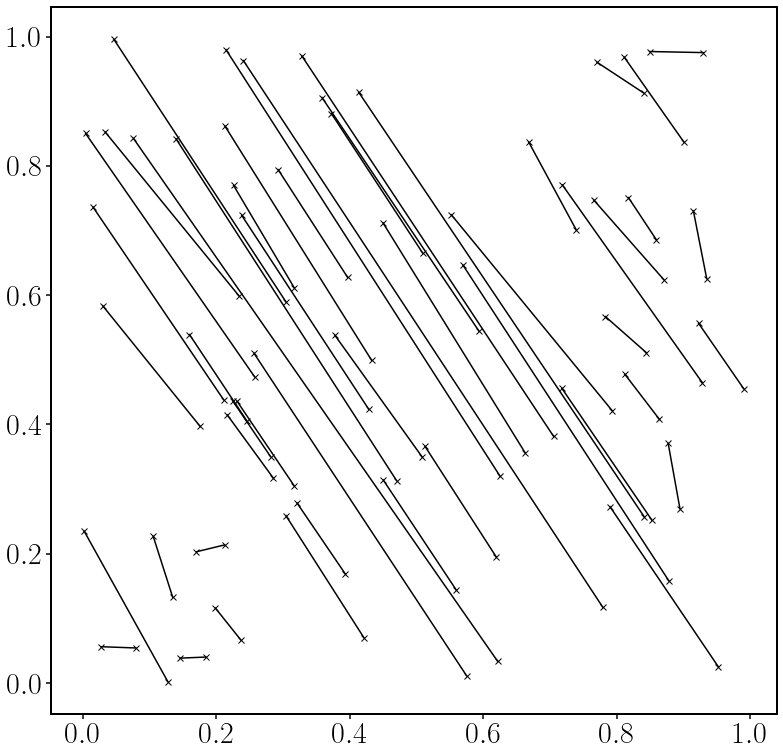

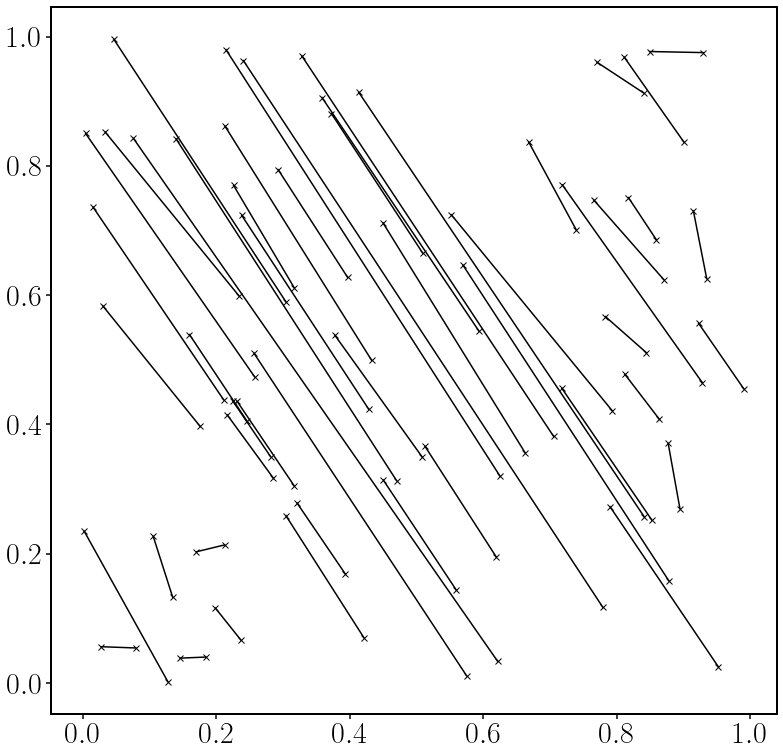

In [81]:
show_solution(coords,pca_sol)